In [1]:
#Haremos una red neuronal para comvertir d egrados celcius a Fahrenheit

Hola mundo


In [5]:
#Librerias que usamos en este ejercicio.
import tensorflow as tf
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
#Cargamos el dataset de entranmiento.
df = pd.read_csv("celsius_a_fahrenheit.csv")
df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

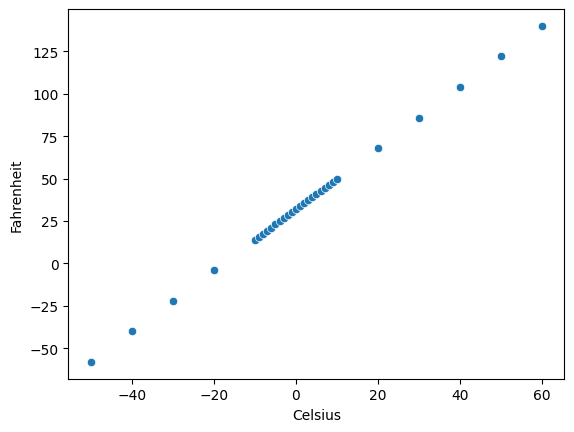

In [9]:
#Es solo para ver si tienen una relacion.
sns.scatterplot(x= df['Celsius'], y=df['Fahrenheit'])

In [10]:
#Aqui solo separamos las vaiables independeintes de las dependientes en este caso Farenheit es dependiente de los Celsius.
x_train = df['Celsius']
y_train = df['Fahrenheit']

In [12]:
#Este es para decirle que nuestra red neuronal sera secuencial entonces iremos alimentando capa por capa.
model = tf.keras.Sequential()
#Esta sera la forma en como recibira mis "inputs" mi neurona 
model.add(tf.keras.layers.Dense(units= 1, input_shape = [1]))


C:\Users\Lenovo 1\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Este mos dice si mi red neuronal a sido cargada correctamente.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Aqui solo compilamos el modelo y de funcion de perdida usamos el "Error Cuadrado Perfecto"
#y como ptmimizador usamos Adam 
model.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss='mean_squared_error')

In [24]:
#Entrenamos mi modelo 
#epochs significa las veces que entrena por ejempo mi dataset tiene 30 entonces va del 1 al 30 eso es un epoch asi hasta que complete 100
epocs_hist = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - loss: 1.3334
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 507.0362
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 33.8098
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 106.6011
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 290.2286
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 221.7623
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 65.4641
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.1810
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 60.3674
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 136.5609
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 135.2325
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 70.0056
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 10.4742
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 5.0535
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 43.383

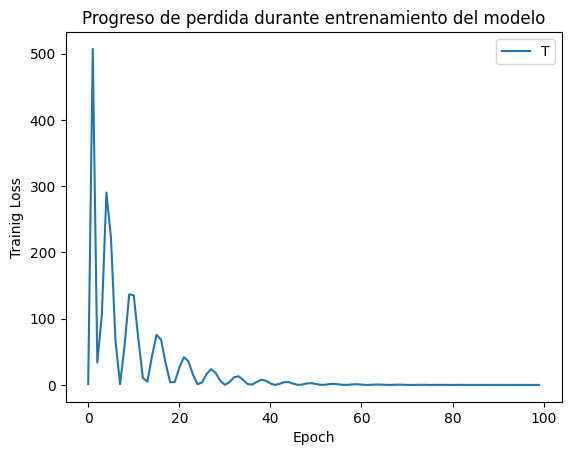

In [25]:
#Evaluacion del modelo y Grafico del mismo me dira las perdida y como mi modelo esta avanzando con cada iteracion.
epocs_hist.history.keys()

plt.plot(epocs_hist.history['loss'])
plt.title("Progreso de perdida durante entrenamiento del modelo")
plt.xlabel("Epoch")
plt.ylabel("Trainig Loss")
plt.legend('Training Loss')

In [30]:
model.get_weights()

#Cargamos el dataframe de prueba el cual contiene solamente id y la temperatura en celcius. 
df_test= pd.read_csv('test.csv')


#Prediciones : aqui hago cargo de los valores del dataframe al modelo el cual simpre recibe 
#un numpy array para poder hacer las prediciones.
Temp_c = df_test['Celsius'].values
Temp_F= model.predict(([Temp_c])).flatten()

#Este es mi dataframe de salida el cual solo tendra id y los grados en Fahrenheit.
df_output = pd.DataFrame({
    'id': df_test['id'],
    'Fahrenheit': Temp_F
})

#Solo gruardo el resultado
df_output.to_csv("output.csv", index=False)
print("Archivo guardado con exito")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Archivo guardado con exito
